In [108]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


### **LOADING DATASET**


In [109]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [110]:
df1 = df.drop(columns=["Id"])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [111]:
df1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
df1.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [113]:
# to display no. of samples on each class
df1['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [114]:
# check for null values
df1.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **PREPROCESSING**

In [115]:
df1.isnull().sum()
# no null values present

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **EXPLORATORY DATA ANALYSIS**

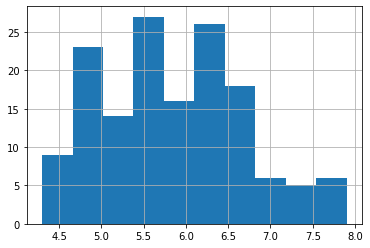

In [116]:
df1['SepalLengthCm'].hist()

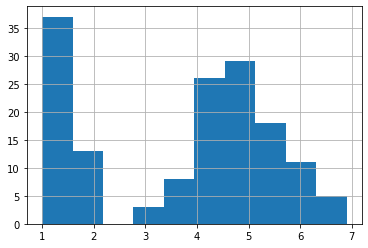

In [117]:
df1['PetalLengthCm'].hist()

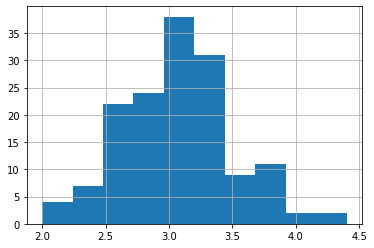

In [118]:
df1['SepalWidthCm'].hist()

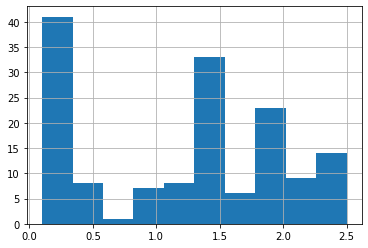

In [119]:
df1['PetalWidthCm'].hist()

In [120]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa', 'Iris-virginica', 'Iris-versicolor']

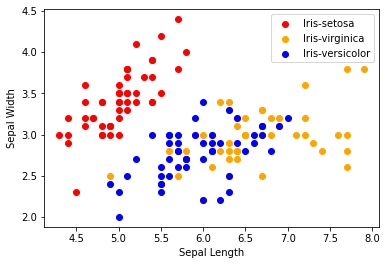

In [121]:
for i in range(3):
  x=df1[df1['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c =colors[i], label= species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

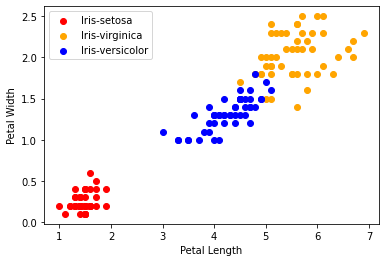

In [122]:
for i in range(3):
  x=df1[df1['Species']==species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c =colors[i], label= species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

### **In the above plot we can see that all three samples are more classified and has a linear relation and can be identified seperately.**

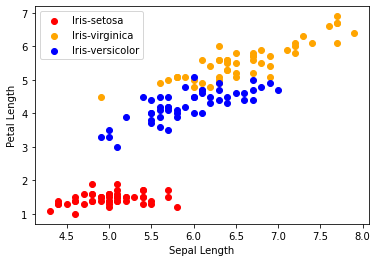

In [123]:
for i in range(3):
  x=df1[df1['Species']==species[i]]
  plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c =colors[i], label= species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()

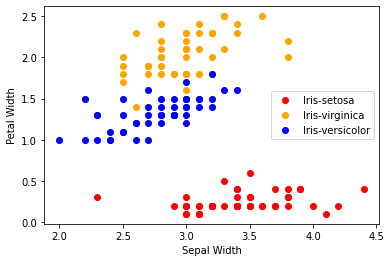

In [124]:
for i in range(3):
  x=df1[df1['Species']==species[i]]
  plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c =colors[i], label= species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

### **CORRELATION MATRIX**

In [125]:
df1.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


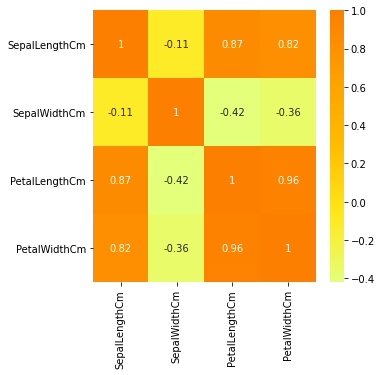

In [126]:
corr = df1.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot = True, ax=ax, cmap = 'Wistia')

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [128]:
df1['Encoded Species'] = le.fit_transform(df['Species'])
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


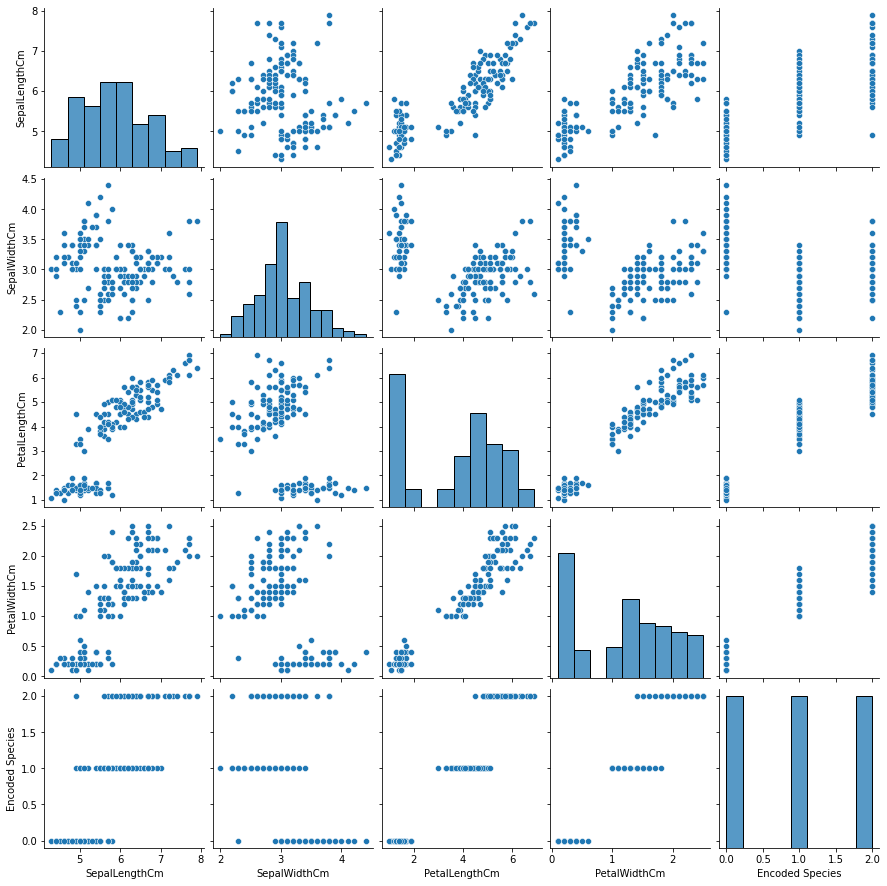

In [129]:
sns.pairplot(df1)

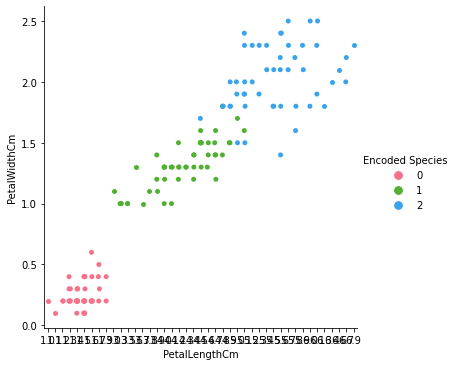

In [130]:
sns.catplot(x= 'PetalLengthCm', y= 'PetalWidthCm', palette='husl', hue='Encoded Species', data= df1)

### **MODELLING**


In [131]:
from sklearn.model_selection import train_test_split
#train-70%
#test-30%
train, test = train_test_split(df1, test_size=0.2)

In [132]:
train.shape, test.shape

((120, 6), (30, 6))

In [133]:
df1.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Encoded Species'],
      dtype='object')

In [134]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train['Encoded Species']
test_y = test['Encoded Species']

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [136]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x, train_y);

In [137]:
predictions = dtree.predict(test_x)
print("The accuracy of decision tree is: ", metrics.accuracy_score(predictions, test_y))


The accuracy of decision tree is:  0.9666666666666667


### **The accuracy is 96%. So we can create model for entire data**

In [138]:
X = df1[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df1['Encoded Species']

In [139]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is ready")

Decision Tree Classifier is ready


### **VISUALIZING THE DECISION TREE**

In [140]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import sklearn.datasets as datasets

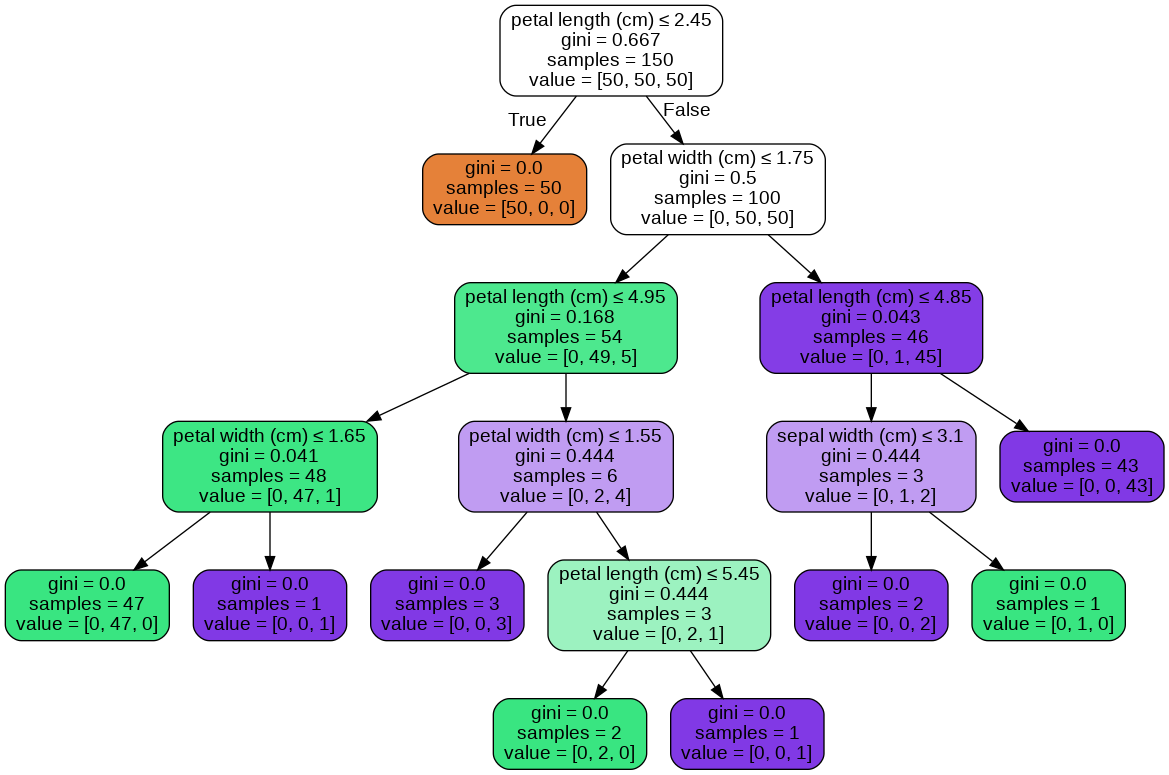

In [141]:
iris_set = datasets.load_iris()
dot_data = StringIO()
export_graphviz(dtree1, out_file= dot_data, feature_names= iris_set.feature_names,
                filled = True, rounded = True,
                special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### **It is observed that the leaf nodes are homogeneous**